In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Conv1D, GlobalMaxPool1D, Input
from keras.layers import Dense, Dropout, MaxPooling1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split


data = pd.read_csv('drive/My Drive/ALDAproject/train.csv')

In [0]:
#print(data)
data = data.values
X_train = data[:,1]
Y_train = data[:,2]

print(Y_train)

[0 0 0 ... 0 0 0]


In [0]:
print(X_train)
print(Y_train)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
encoded = tokenizer.texts_to_sequences(X_train)

print(X_train[8])
print(encoded[8:9])

Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169
[[263, 22, 1, 286, 34847, 24, 1476, 2, 6, 489, 73, 14, 9215, 2, 330, 215, 10, 1, 23, 1473, 51, 47, 2898, 15, 35, 12, 199, 73, 1051, 1060, 9, 11, 16, 57, 1390, 37, 48, 40, 81, 11, 12, 480, 17, 5, 273, 7, 18, 55, 2, 1, 4850, 8153, 27, 26, 78, 669, 5, 1368, 11, 687, 2, 96147, 96148, 53, 8, 5, 702, 7774, 23, 9, 1094, 6, 46, 468, 41, 251, 16, 159, 324, 21, 3566, 10, 13824, 3439, 4584, 3890, 4851]]


In [0]:
max_len = 0;
for i in range(0, len(encoded)):
    if max_len < len(encoded[i]):
        max_len = len(encoded[i])

max_len = max_len + 1
print(max_len)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1404
210338


In [0]:
from keras.preprocessing.sequence import pad_sequences

padded_docs = pad_sequences(encoded, maxlen=1404, padding='post')

print(padded_docs)
X_train, X_test, Y_train, Y_test = train_test_split( padded_docs, Y_train, test_size=0.2, random_state=42)

[[  688    75     1 ...     0     0     0]
 [96145    52  2635 ...     0     0     0]
 [  412   437    73 ...     0     0     0]
 ...
 [34278  7330  5208 ...     0     0     0]
 [    4    11   574 ...     0     0     0]
 [    4     7   134 ...     0     0     0]]


In [0]:
input_seq = Input(shape=(1404, ))
embed = Embedding(vocab_size, 100, input_length=1404)(input_seq)
x = Flatten()(embed)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
classi = Dense(1, activation='sigmoid')(x)
classifier = Model(input_seq, classi)
classifier.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 140400)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              143770624 
_________________________________________________________________
dense_13 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
__________

In [0]:
print(X_train)
print(X_test)

[[14832  9031    56 ...     0     0     0]
 [  674    85   819 ...     0     0     0]
 [    1  5487     3 ...     0     0     0]
 ...
 [    7   578   172 ...     0     0     0]
 [  628  1560     7 ...     0     0     0]
 [    6    19   240 ...     0     0     0]]
[[13327    19     6 ...     0     0     0]
 [34915  1411    94 ...     0     0     0]
 [ 4070    46  4504 ...     0     0     0]
 ...
 [  345 63107   277 ...     0     0     0]
 [    5  1684   576 ...     0     0     0]
 [28891    89    20 ...     0     0     0]]


In [0]:
classifier.fit(X_train, Y_train, batch_size=512, epochs = 40, 
    verbose=1, validation_data= (X_test, Y_test))

In [0]:
predictions = classifier.predict(X_test)
print(predictions)

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

[[8.5836649e-04]
 [0.0000000e+00]
 [9.2387199e-07]
 ...
 [6.2621435e-22]
 [9.9999058e-01]
 [2.5321226e-05]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [0]:
from sklearn.metrics import confusion_matrix, classification_report

print(predictions)
Y_test = [[i] for i in Y_test]

print(Y_test)
print(classification_report(Y_test, predictions))

pd.DataFrame(
   confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0

Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28143   716
       Toxic           856  2200

In [0]:
predictions = classifier.predict(X_test)
print(predictions)

[[2.8295219e-03]
 [2.0861626e-07]
 [4.5299530e-06]
 ...
 [1.4581055e-19]
 [9.9992883e-01]
 [1.1904419e-06]]


roc_curve 0.9443420088718049


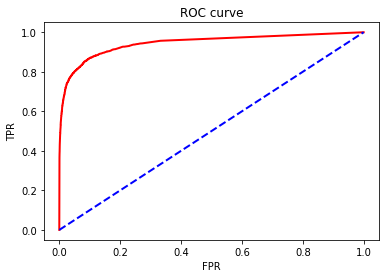

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(Y_test,predictions)

print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     28859
           1       0.77      0.73      0.75      3056

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.87      0.85      0.86     31915
weighted avg       0.95      0.95      0.95     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28206   653
       Toxic           829  2227

In [0]:
import pandas as pd
data = pd.read_csv('drive/My Drive/ALDAproject/Test_this.csv')

#print(data)
data = data.values
X_train = data[0:8,0]

print(X_train)

encoded = tokenizer.texts_to_sequences(X_train)
padded_docs = pad_sequences(encoded, maxlen=1404, padding='post')

print(padded_docs)

predictions = classifier.predict(padded_docs)
print(predictions)

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

['I do not think you are a bad human being your circumstances made you that '
 'He had killed many people in the past and would continue to kill if we do not do somehing about it'
 'You need some help, his retaeded brother was brave enough to serve in the military '
 'The word fuck is very inappropriate please refrain from using. It leaves a bad impression.'
 'The murder rates for those cities are high I would suggest looking after your family. These psychopaths are dagerous, keep yourself safe.'
 'In a time were rape and harassment are widespread, we need to stand up againt the bullies.'
 'I will kill your faimily, nice good wonderful.']
[[   7   33   14 ...    0    0    0]
 [  52   99 1427 ...    0    0    0]
 [   6  122   60 ...    0    0    0]
 ...
 [   1 1861 5931 ...    0    0    0]
 [  10    5   84 ...    0    0    0]
 [   7   44 1026 ...    0    0    0]]
[[0.37872627]
 [0.28871262]
 [0.00165451]
 [0.992082  ]
 [0.00495025]
 [0.4644962 ]
 [0.9542171 ]]
[[0.]
 [0.]
 [0.]
 [1.]
 [